In [2]:
import pandas as pd
import numpy as np

#NLTK library used for NLP techniques
import nltk

#string library used for removing punctuation and stopwords
import string

#re is used for Regex operations
import re

#showing how many characters in a line
pd.set_option('display.max_colwidth', 300)   

#reading the final dataset
data = pd.read_csv("/Users/aditiwalia/Downloads/Dataset - Final Sheet.tsv", sep='\t', header=None)

#columns of the data frame
data.columns = ['username', 'tweet', 'label', 'random']


In [3]:
stopwords = nltk.corpus.stopwords.words('english')

#stopwords.remove('is')
#'is' in stopwords

## Data Cleaning and Tokenizing

In [4]:
'''
remove_extras implemented to remove the following:
1.) The hyperlinks and URLs in the tweet
2.) RT or retweet tag
3.) HTML character codes like &amp

Parameters: a list of tokens
Returns: a string with the removed elements
'''
def remove_extras(tokens):
    text_noUrl = []
    for word in tokens:
        if "https" in word or "http" in word or word == "RT" or word == "amp":
            continue
        text_noUrl.append(word)
    return text_noUrl

'''
remove_punctAndAlphanumeric implemented to remove the punctuations and other alphanumeric characters in the text

Parameters: a string
Returns: a string with the removed elements
''' 
def remove_punctAndAlphanumeric(text):
    text_noExtra = "".join([char for char in text if char not in string.punctuation and (char in string.ascii_letters or char in char in string.whitespace)])
    return text_noExtra


'''
remove_stop implemented to remove the stopwords except "IS" because "IS" is short form for ISIS

Parameters: a list of tokens
Returns: a list of tokens with stopword tokens removed
'''
def remove_stop(tokens):
    tokens_noStop = [word for word in tokens if word not in stopwords]
    return tokens_noStop

'''
lemmatize implemented to lemmatize words/reduce each word to its basic lemma or root

Parameters: a list of tokens
Returns: a list of tokens with lemmatized words
'''
wn = nltk.WordNetLemmatizer()
def lemmatize(tokens):
    lemma_tokens = [wn.lemmatize(word) for word in tokens]
    return lemma_tokens

'''
cleanAndTokenize implemented for the cleaning, tokenizing and lemmatizing the tweets

Parameters: a string (tweets)
Returns: a list of tokens (cleaned and lemmatized)
'''
def cleanAndTokenize(text):
    cleanedText = remove_punctAndAlphanumeric(text)
    tokens = re.split('\W+',cleanedText)
    tokens_removedExtras = remove_extras(tokens)
    tokens_removedStop = remove_stop(tokens_removedExtras)
    tokens_lemmatized = lemmatize(tokens_removedStop)
    return tokens_lemmatized
    

In [5]:
#clean data
data['preprocessed_tweet'] = data['tweet'].apply(lambda x: cleanAndTokenize(x.lower()))
cleaned_tokens = data['tweet'].apply(lambda x: cleanAndTokenize(x.lower())).values.tolist()
print(type(cleaned_tokens))
#data.head(20)

<class 'list'>


In [6]:
#add tweet length feature
data['tweet_len'] = data['tweet'].apply(lambda x: len(x) - x.count(" "))
data.head(20)

,username,tweet,label,random,preprocessed_tweet,tweet_len
0,jxnatc,@RondaRousey Good luck tonight Rowdy! We're pulling for you! #NoToISIS #Prayers4Paris,0,0.166829,"[rondarousey, good, luck, tonight, rowdy, pulling, notoisis, prayersparis]",75
1,ashuneras,this is such a good question,0,0.791709,"[good, question]",23
2,CSULBASI,Have you ever wondered what major fits your extracurricular interests? Well now you can find out with one simple quiz! ‚†Ä ‚†Ä Take the quiz https://bit.ly/2XXpPGD,0,0.087267,"[ever, wondered, major, fit, extracurricular, interest, well, find, one, simple, quiz, take, quiz]",138
3,dqkidd,"#KSATFIESTA hello Leilana, Eli, Maxi, Aliyah, Carmen, Gabby, Ellie and paul watching the parade!!!!!! Quirogas &amp; Amayas Viva Fiesta!!!!",0,0.861475,"[ksatfiesta, hello, leilana, eli, maxi, aliyah, carmen, gabby, ellie, paul, watching, parade, quirogas, amayas, viva, fiesta]",121
4,Khen_Bee,"If you want to leave, take good care. Hope you have a lot of nice things to wear, but then a lot of nice things turn bad out there.",0,0.514142,"[want, leave, take, good, care, hope, lot, nice, thing, wear, lot, nice, thing, turn, bad]",103
5,douglvslee,Regina Hall was my first girl crush. her character in Malibu‚Äôs Most Wanted did something to my lil hormones.,0,0.237339,"[regina, hall, first, girl, crush, character, malibus, wanted, something, lil, hormone]",92
6,lilwolf___,how do girls take cute tongue out pics??? I look like I‚Äôm ab to slob on a knob when I do that shit,0,0.991494,"[girl, take, cute, tongue, pic, look, like, im, ab, slob, knob, shit]",78
7,thebabydoll__,So did he really pass or what ?,0,0.362523,"[really, pas, ]",24
8,abubakerdimshqi,from the Heart love and respect for all #MUJAHDIN in BILAD #ALSHAM Brothers&amp;Sisters you are our hope to lead us to right way #IS,1,0.041372,"[heart, love, respect, mujahdin, bilad, alsham, brothersampsisters, hope, lead, u, right, way]",109
9,robertmanoin,you misspelled RED omg,0,0.437904,"[misspelled, red, omg]",19


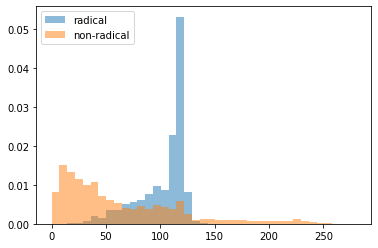

In [58]:
from matplotlib import pyplot
bins = np.linspace(0, 280, 40)    #cutpoints showing an array with 40 evenly spaced numbers b/w 0 and 200

pyplot.hist(data[data['label']==1]['tweet_len'], bins, alpha=0.5, density=True, label='radical') #histogram for distr. of body length for only spam
pyplot.hist(data[data['label']==0]['tweet_len'], bins, alpha=0.5, density=True, label='non-radical')   #histogram for distr. of body length for only ham    
pyplot.legend(loc='upper left')
pyplot.show()

In [7]:
#radical keyworda
radical_keywords = ['KUFFUR', 'IS', 'ISLAMIC STATE', '#ILOVEISIS', 'KUFFARS', 'mujahiddeen',
                    'kuffur', 'KUFFAR', 'kuffars', 'kuffar', 'kafir', 'MUJAHIDEEN', 'KUFAR', 'KAFIR',
                    'KUFR', 'mujahideen', '#IS', 'kufar', 'kufr', 'mujahid', 'JIHAD', 'jihad', 'MUJAHID',
                    'MUJAHIDDEEN', '#ISIS', 'Islamic State', '#ILoveISIS', 'ISIL', 'allah', 'Allah', 'Assad', 'assad', 'PKK',
                    'YPG', '#AleppoIsBurning', 'Aleppo', 'martydom', 'Martyrdom']

def radicalWordPresence(text):
    for key in radical_keywords:
        if key in text:
            return 1
    return 0

In [8]:
#add rad key feature
data['rad_key'] = data['tweet'].apply(lambda x:radicalWordPresence(x))
#data.head(20)

In [10]:
import gensim
import gensim.models.keyedvectors as word2vec

#from gensim.models import Word2Vec, KeyedVectors

In [11]:
#model = Word2Vec.load("/Users/aditiwalia/Downloads/GoogleNews-vectors-negative300.bin.gz")
model = word2vec.KeyedVectors.load_word2vec_format('/Users/aditiwalia/Downloads/GoogleNews-vectors-negative300.bin.gz', binary=True)


In [12]:
model.most_similar('kuffar')

[('kafir', 0.6600816249847412),
 ('Kuffar', 0.6480599045753479),
 ('infidels', 0.6436571478843689),
 ('unbelievers', 0.6348938941955566),
 ('polytheists', 0.6023821830749512),
 ('Kafirs', 0.5989149808883667),
 ('Allah', 0.5932642817497253),
 ('infidel', 0.5747469663619995),
 ('jihad', 0.5737059712409973),
 ('kafirs', 0.5729705691337585)]

In [13]:
def get_vector(processed_tweet):
        # convert to lowercase, ignore all special characters - keep only
        # alpha-numericals and spaces
        #sentence = re.sub(r'[^A-Za-z0-9\s]', r'', str(sentence).lower())

        vectors = [model.wv[w] for w in processed_tweet
                   if w in model.wv]

        v = np.zeros(model.vector_size)

        if (len(vectors) > 0):
            v = (np.array([np.sum(x) for x in zip(*vectors)])) / v.size

        return v

In [15]:
data['sentence_vec'] = data['preprocessed_tweet'].apply(lambda x: get_vector(x))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys


In [16]:
from numpy.linalg import norm

def similarity(xv, yv):
        #xv = self.get_vector(x)
        #yv = self.get_vector(y)

        score = 0

        if xv.size > 0 and yv.size > 0:
            score = np.dot(xv, yv) / (norm(xv) * norm(yv))

        return score

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['sentence_vec', 'tweet_len', 'rad_key']], data['label'], test_size=0.2)



In [25]:
#Using Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
X_train_vect = pd.concat([X_train[['rad_key','tweet_len']].reset_index(drop=True), 
                         pd.DataFrame(X_train['sentence_vec'].values.tolist())], axis=1)
X_test_vect = pd.concat([X_test[['rad_key','tweet_len']].reset_index(drop=True), 
                         pd.DataFrame(X_test['sentence_vec'].values.tolist())], axis=1)



In [26]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine



Fit Time: 0.99 / Pred Time: 0.113 -------- Precision: 0.876 / Recall: 0.511 / Accuracy: 0.911


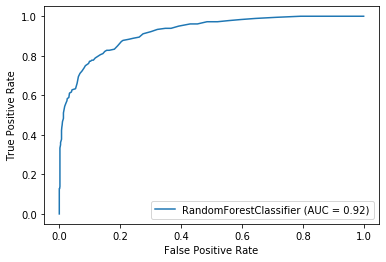

In [27]:
#Random forest

from sklearn.metrics import plot_roc_curve
rf = RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = round((end - start),3)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = round((end - start),3)

precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
print('Fit Time: {} / Pred Time: {} -------- Precision: {} / Recall: {} / Accuracy: {}'.format(
fit_time, pred_time, round(precision,3), round(recall,3), round(((y_test==y_pred).sum() / len(y_pred)),3)
))

rf_disp = plot_roc_curve(rf_model, X_test_vect, y_test)



Fit Time: 95.415 / Pred Time: 0.013 -------- Precision: 0.837 / Recall: 0.711 / Accuracy: 0.932


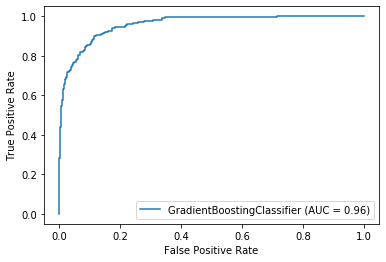

In [28]:
#gradient boost

gb = GradientBoostingClassifier(n_estimators=150, max_depth=7)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = round((end - start),3)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = round((end - start),3)

precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
print('Fit Time: {} / Pred Time: {} -------- Precision: {} / Recall: {} / Accuracy: {}'.format(
fit_time, pred_time, round(precision,3), round(recall,3), round(((y_test==y_pred).sum() / len(y_pred)),3)
))

gb_disp = plot_roc_curve(gb_model, X_test_vect, y_test)

Fit Time: 23.554 / Pred Time: 0.13 -------- Precision: 0.802 / Recall: 0.722 / Accuracy: 0.928


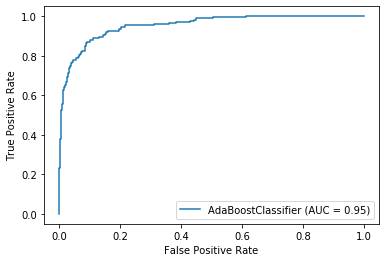

In [29]:
#adaboost
ab = AdaBoostClassifier(learning_rate=1,n_estimators=200)

start = time.time()
ab_model = ab.fit(X_train_vect, y_train)
end = time.time()
fit_time = round((end - start),3)

start = time.time()
y_pred = ab_model.predict(X_test_vect)
end = time.time()
pred_time = round((end - start),3)

precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
print('Fit Time: {} / Pred Time: {} -------- Precision: {} / Recall: {} / Accuracy: {}'.format(
fit_time, pred_time, round(precision,3), round(recall,3), round(((y_test==y_pred).sum() / len(y_pred)),3)
))

ab_disp = plot_roc_curve(ab_model, X_test_vect, y_test)


Fit Time: 0.036 / Pred Time: 0.01 -------- Precision: 0.434 / Recall: 0.656 / Accuracy: 0.81


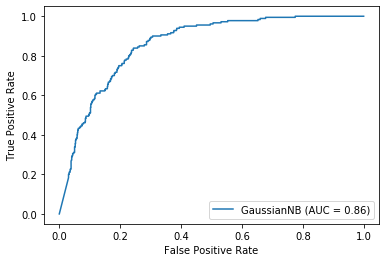

In [49]:
#gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

start = time.time()
nb_model = nb.fit(X_train_vect, y_train)
end = time.time()
fit_time = round((end - start),3)

start = time.time()
y_pred = nb_model.predict(X_test_vect)
end = time.time()
pred_time = round((end - start),3)

precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
print('Fit Time: {} / Pred Time: {} -------- Precision: {} / Recall: {} / Accuracy: {}'.format(
fit_time, pred_time, round(precision,3), round(recall,3), round(((y_test==y_pred).sum() / len(y_pred)),3)
))

nb_disp = plot_roc_curve(nb_model, X_test_vect, y_test)


Fit Time: 0.081 / Pred Time: 0.096 -------- Precision: 0.656 / Recall: 0.561 / Accuracy: 0.884


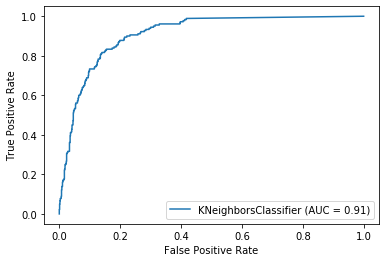

In [48]:
#k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier

# 2. instantiate the model (with the default parameters)
knn = KNeighborsClassifier(weights='distance',n_neighbors=25)

start = time.time()
knn_model = knn.fit(X_train_vect, y_train)
end = time.time()
fit_time = round((end - start),3)

start = time.time()
y_pred = knn_model.predict(X_test_vect)
end = time.time()
pred_time = round((end - start),3)

precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
print('Fit Time: {} / Pred Time: {} -------- Precision: {} / Recall: {} / Accuracy: {}'.format(
fit_time, pred_time, round(precision,3), round(recall,3), round(((y_test==y_pred).sum() / len(y_pred)),3)
))

nb_multinom_disp = plot_roc_curve(knn_model, X_test_vect, y_test)


In [ ]:
print(np.count_nonzero(y_pred == 1))

Fit Time: 4.007 / Pred Time: 0.663 -------- Precision: 0.434 / Recall: 0.883 / Accuracy: 0.799


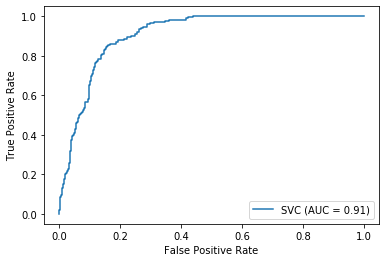

In [51]:
from sklearn import svm

sv = svm.SVC(C=1000,kernel='rbf',class_weight='balanced')

start = time.time()
sv_model = sv.fit(X_train_vect, y_train)
end = time.time()
fit_time = round((end - start),3)

start = time.time()
y_pred = sv_model.predict(X_test_vect)
end = time.time()
pred_time = round((end - start),3)

precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
print('Fit Time: {} / Pred Time: {} -------- Precision: {} / Recall: {} / Accuracy: {}'.format(
fit_time, pred_time, round(precision,3), round(recall,3), round(((y_test==y_pred).sum() / len(y_pred)),3)
))



sv_disp = plot_roc_curve(sv_model, X_test_vect, y_test)



In [ ]:
print(np.count_nonzero(y_pred == 1))

In [67]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X_vect, y, cv=5)
print(scores)




[0.84419014 0.84419014 0.84419014 0.84493392 0.84493392]


In [52]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
from sklearn.metrics import roc_curve, roc_auc_score
classifiers=[knn,ab,nb,sv,rf,gb]
y_pred_knn = knn_model.predict(X_test_vect)
fpr, tpr, _ = roc_curve(y_test,  y_pred_knn)
auc = roc_auc_score(y_test, y_pred_knn)
result_table = result_table.append({'classifiers':knn.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)


y_pred_ab=ab_model.predict(X_test_vect)
fpr, tpr, _ = roc_curve(y_test,  y_pred_ab)
auc = roc_auc_score(y_test, y_pred_ab)
result_table = result_table.append({'classifiers':ab.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

y_pred_nb=nb_model.predict(X_test_vect)
fpr, tpr, _ = roc_curve(y_test,  y_pred_nb)
auc = roc_auc_score(y_test, y_pred_nb)
result_table = result_table.append({'classifiers':nb.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
y_pred_svm=sv_model.predict(X_test_vect)
fpr, tpr, _ = roc_curve(y_test,  y_pred_svm)
auc = roc_auc_score(y_test, y_pred_svm)
result_table = result_table.append({'classifiers':sv.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
y_pred_rf=rf_model.predict(X_test_vect)
fpr, tpr, _ = roc_curve(y_test,  y_pred_rf)
auc = roc_auc_score(y_test, y_pred_rf)
result_table = result_table.append({'classifiers':rf.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
y_pred_gb=gb_model.predict(X_test_vect)
fpr, tpr, _ = roc_curve(y_test,  y_pred_gb)
auc = roc_auc_score(y_test, y_pred_gb)
result_table = result_table.append({'classifiers':gb.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)


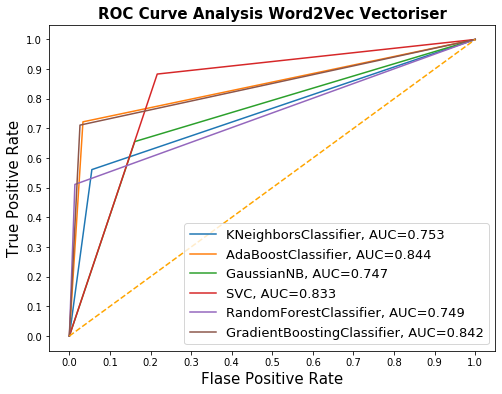

In [53]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))


for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis Word2Vec Vectoriser', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()